In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
def warmUp(n_servers, n_customers):
    
    lambda_customer = 0.125
    lambda_server = 0.1
    
    customer = np.random.exponential(lambda_customer)
    
    server_times = [10000000000] * n_servers
    server_statuses = [0] * n_servers
    next_server_idx = 0
    next_server_t = 1000000
    ques = [[]] * n_servers
    times = []
    arrivals = []
    t = 0
        
    while len(times) < n_customers:
        #print("----------------------")
        #print(server_statuses)
        if customer < next_server_t:
            arrivals.append(customer)
            if server_statuses[0] == 0:
                server_times[0] = customer + np.random.exponential(lambda_server)
                server_statuses[0] = 1
            else:
                ques[0].append(1)
            
            t = customer 
            customer = t + np.random.exponential(lambda_customer)
            
            next_server_t = min(server_times)
            next_server_idx = server_times.index(next_server_t)
        else:
            if next_server_idx == n_servers - 1:
                times.append(next_server_t)   
            elif server_statuses[next_server_idx + 1] == 0:
                server_times[next_server_idx + 1] = next_server_t + np.random.exponential(lambda_server)
                server_statuses[next_server_idx + 1] = 1
            else:
                ques[next_server_idx + 1].append(1)
                 
            if len(ques[next_server_idx]) > 0:
                server_times[next_server_idx] = next_server_t + np.random.exponential(lambda_server)
                ques[next_server_idx].pop(0)
            else:
                server_times[next_server_idx] = 10000000
                server_statuses[next_server_idx] = 0
            
            t = next_server_t 
            
            next_server_t = min(server_times)
            next_server_idx = server_times.index(next_server_t)    
    return np.array(times) - np.array(arrivals)[0:len(times)]

A function for running a certain amount of warm-ups for a certain amount of customers with a certain amount of servers.

In [57]:
def simulation(simulations, customers, servers):
    #setting up a matrix to store the simulation results 
    times = [[]]*simulations 
    
    #running the simulations 
    for i in range(0,simulations):
        times[i] = warmUp(servers, customers)
    
    return np.array(times)

In [27]:
#function for computing running mean
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

Manually doing the welch process for the different amounts of servers since I am lazy.

In [107]:
iterations = 2000
customers = 300
window = 5

server_1 = running_mean(np.mean(simulation(iterations, customers, 1).T, 1), window)
server_2 = running_mean(np.mean(simulation(iterations, customers, 2).T, 1), window)
server_3 = running_mean(np.mean(simulation(iterations, customers, 3).T, 1), window)
server_4 = running_mean(np.mean(simulation(iterations, customers, 4).T, 1), window)
server_5 = running_mean(np.mean(simulation(iterations, customers, 5).T ,1), window)

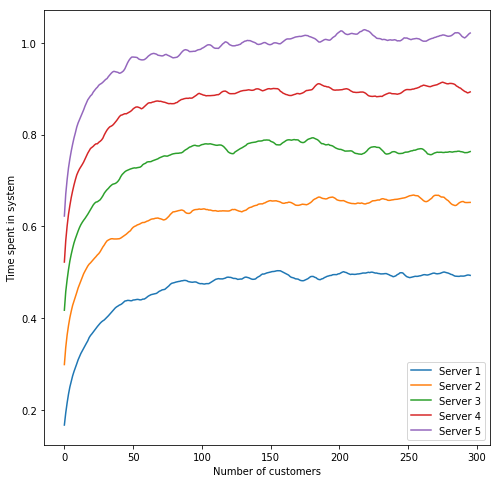

In [118]:
plt.figure(1, (8, 8))
plt.plot(server_1, label = "Server 1")
plt.plot(server_2, label = "Server 2")
plt.plot(server_3, label = "Server 3")
plt.plot(server_4, label = "Server 4")
plt.plot(server_5, label = "Server 5")
plt.legend()
plt.xlabel("Number of customers")
plt.ylabel("Time spent in system")